# Assignment Name: Bike Sharing Assignment
### By: Isha Khatkar

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings('ignore')

### Examining and Comprehending the Data

In [268]:
#Loading file 

data = pd.read_csv(r"C:\UpGrad\BikeSharingAssignment\day.csv")
df = pd.DataFrame(data)
print(df.head())
print(f"Number of rows and columns: {df.shape}")

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
Number of rows and columns

In [269]:
# Displaying summary information about the DataFrame
df.info()

# Generating descriptive statistics of the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Findings: The dataset contains 730 rows and 16 columns.

All columns, except one, are of either float or integer type.

One column is of date type.

Upon reviewing the data, some fields appear to be categorical but are represented as integers or floats.

We will assess and determine whether to convert these fields to categorical data or retain them as integers.

### Data Quality Assessment 

In [270]:
# Calculating the percentage of missing values in each column

missing_percentage = 100 * (df.isnull().sum() / len(df))
round(missing_percentage, 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [271]:
# Calculating the percentage of missing values row-wise

row_missing_percentage = (df.isnull().sum(axis=1) / len(df)) * 100
round(row_missing_percentage, 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Findings:
There are no missing or null values in any of the columns or rows.

In [272]:
df_dup = df.copy()

# Identifying and removing any duplicate rows from the DataFrame
df_dup.drop_duplicates(inplace=True)

In [273]:
print(f"Shape of the duplicate DataFrame: {df_dup.shape}")
print(f"Shape of the original DataFrame: {df.shape}")

Shape of the duplicate DataFrame: (730, 16)
Shape of the original DataFrame: (730, 16)


Insights: After applying the drop duplicates command, the shape of the dataset remains unchanged, indicating that there were no duplicate values in the dataset.

In [274]:
# Creating a copy of the DataFrame excluding the 'instant' column
# as it contains unique values that don't make sense for value counts

df_dummy = df.iloc[:, 1:16]

In [275]:
for column in df_dummy:
    print(df_dummy[column].value_counts(sort=False), '\n\n\n')

09-08-2019    1
12-12-2018    1
07-03-2018    1
27-02-2018    1
17-05-2018    1
             ..
07-08-2018    1
09-01-2018    1
23-06-2019    1
09-02-2018    1
30-06-2019    1
Name: dteday, Length: 730, dtype: int64 



1    180
2    184
3    188
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64 



0    231
1    499
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



34.200847    1
12.060847    1
11.924153    2
19.270000    1
15.101653    1
            ..
20.500000    1
22.994153    1
18.279153    1
27.367500    3
17.425000    1
Name: temp, Length: 498, dtype: int64 



28.50375    1
30.39810    2
33.77625    1
29.29335    1
29.29315

Insights: The dataset appears to be free of any junk or unknown values

Based on an initial review of the data and the data dictionary, the following variables will be excluded from further analysis:

instant: This serves only as an index value.
dteday: This column contains the date, but since we already have separate columns for 'year' and 'month,' it can be removed.
casual & registered: These columns track the count of bikes booked by different customer categories. Since the goal is to determine the total bike count rather than break it down by category, these columns will be disregarded. Additionally, a new variable has been created to capture the ratio of these customer types.
The updated dataset will be saved as df_new to ensure the original dataset remains intact for future analysis or validation.

In [276]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [277]:
df_new = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
             'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
             'cnt']]

# Checking the datatypes before convertion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We will create dummy variables for the four categorical variables: 'mnth', 'weekday', 'season', and 'weathersit'.
We will first convert these columns into the 'category' data type.

In [278]:
# Converting to 'category' data type

df_new['season'] = df_new['season'].astype('category')
df_new['weathersit'] = df_new['weathersit'].astype('category')
df_new['mnth'] = df_new['mnth'].astype('category')
df_new['weekday'] = df_new['weekday'].astype('category')

print("Conversion to 'category' data type is complete.")

df_new.info()

Conversion to 'category' data type is complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [279]:
#Creating dummy variables, droping the original variable for which the dummy was created, droping the first dummy variable for each set of dummies created

df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

print("Dummy variables have been created and the first dummy variable has been dropped.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### Splitting Data

In [280]:
# Checking the shape before splitting
print(f"Number of rows and columns before splitting: {df_new.shape[0]} rows, {df_new.shape[1]} columns")

# Checking the info before splitting
print("Dataset info before splitting:")
df_new.info()

print("Shape and info have been checked before proceeding with the split.")

Number of rows and columns before splitting: 730 rows, 30 columns
Dataset info before splitting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 n

In [281]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.70, test_size=0.30, random_state=333) # using random_state to ensure the same rows in train and test datasets each time

print("Data has been split into training and testing sets with 70% for training and 30% for testing.")

Data has been split into training and testing sets with 70% for training and 30% for testing.


In [282]:
df_train.info()

print("Information about the training dataset has been displayed.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [283]:
# Check the shape of the training dataset
print(f"Training dataset shape: {df_train.shape[0]} rows, {df_train.shape[1]} columns")

# Display info about the test dataset
df_test.info()

print("Shape of the training dataset and info of the test dataset have been displayed.")

Training dataset shape: 510 rows, 30 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null 

In [284]:
# Check the shape of the test dataset
print(f"Test dataset shape: {df_test.shape[0]} rows, {df_test.shape[1]} columns")

# Display info about the training dataset
df_train.info()

print("Shape of the test dataset and info of the training dataset have been displayed.")

Test dataset shape: 219 rows, 30 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    

### EDA

In [285]:
print("Columns in the training dataset:", df_train.columns)

print("The columns of the training dataset have been displayed.")

Columns in the training dataset: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')
The columns of the training dataset have been displayed.


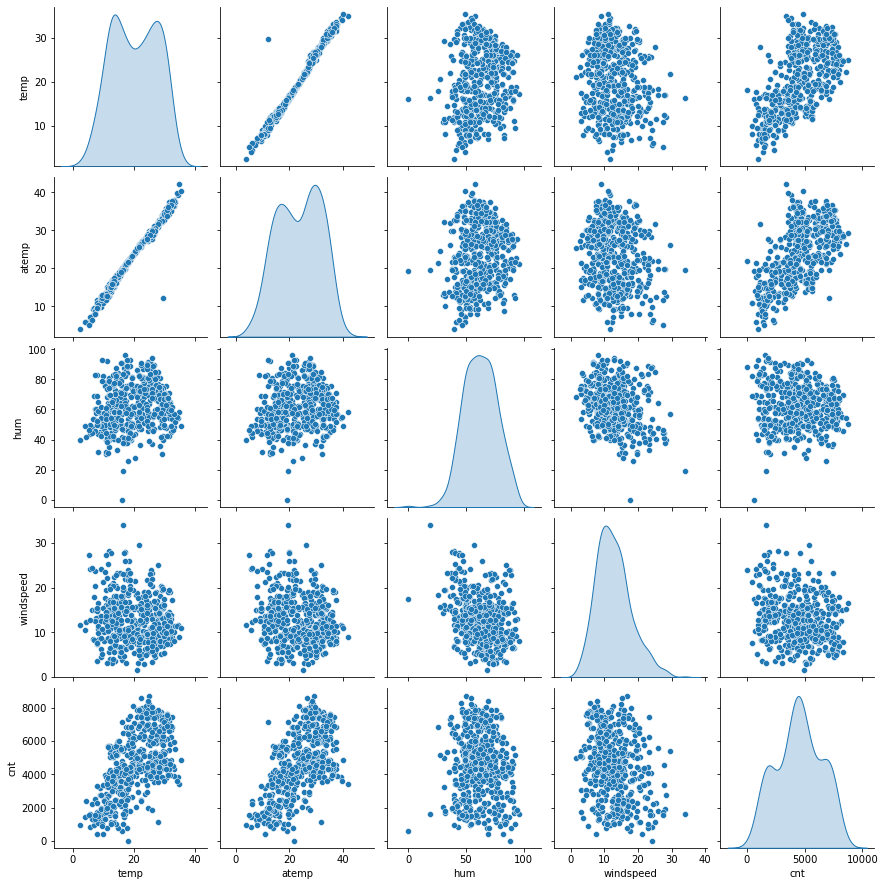

Pairplot of numeric variables has been displayed.


In [286]:
# Creating a new dataframe with only numeric variables

df_num = df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

print("Pairplot of numeric variables has been displayed.")

This plot indicates a linear relationship between 'temp', 'atemp', and 'cnt'.

In [287]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

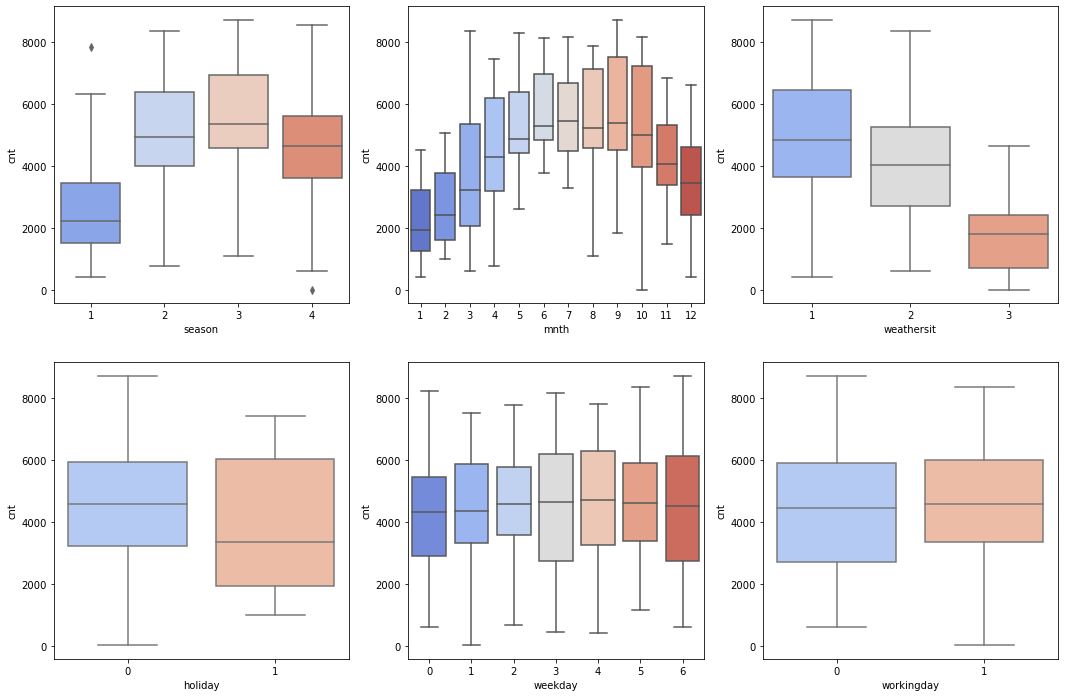

Boxplots for categorical variables against the target 'cnt' have been displayed.


In [288]:
# Create and display boxplots for all categorical variables (before dummies) against the target 'cnt'

plt.figure(figsize=(18, 12)) 
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df, palette="coolwarm")
plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df, palette="coolwarm")
plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y='cnt', data=df, palette="coolwarm")
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df, palette="coolwarm")
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df, palette="coolwarm")
plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df, palette="coolwarm")
plt.show()

print("Boxplots for categorical variables against the target 'cnt' have been displayed.")

There are six categorical variables in the dataset, and we used a box plot (see the figure above) to analyze their effect on the dependent variable ('cnt'). The insights derived are as follows:

season: Approximately 32% of bike bookings occurred during season 3, with a median of over 5,000 bookings over the two-year period. This was followed by seasons 2 and 4, accounting for 27% and 25% of total bookings, respectively. This suggests that season could be a strong predictor for the dependent variable.

mnth: Months 5, 6, 7, 8, and 9 contributed to around 10% of bike bookings each, with a median of over 4,000 bookings per month. This indicates that month has a clear trend in bookings and can be a potential predictor for the dependent variable.

weathersit: About 67% of bike bookings were made under 'weathersit1,' with a median close to 5,000 bookings over two years. 'Weathersit2' followed with 30% of total bookings. This suggests that weather situation does show some influence on bike bookings, making it a potential predictor for the dependent variable.

holiday: Almost 97.6% of bike bookings occurred on non-holiday days, indicating a bias in the data. Therefore, holiday is unlikely to be a useful predictor for the dependent variable.

weekday: The weekday variable shows a similar distribution across all days, with between 13.5% and 14.8% of total bookings each day, and medians ranging from 4,000 to 5,000 bookings. This suggests that weekday may have little to no impact on the dependent variable. The model will ultimately decide whether it should be included or not.

workingday: About 69% of bike bookings occurred on working days, with a median of around 5,000 bookings. This suggests that workingday can be a strong predictor for the dependent variable.

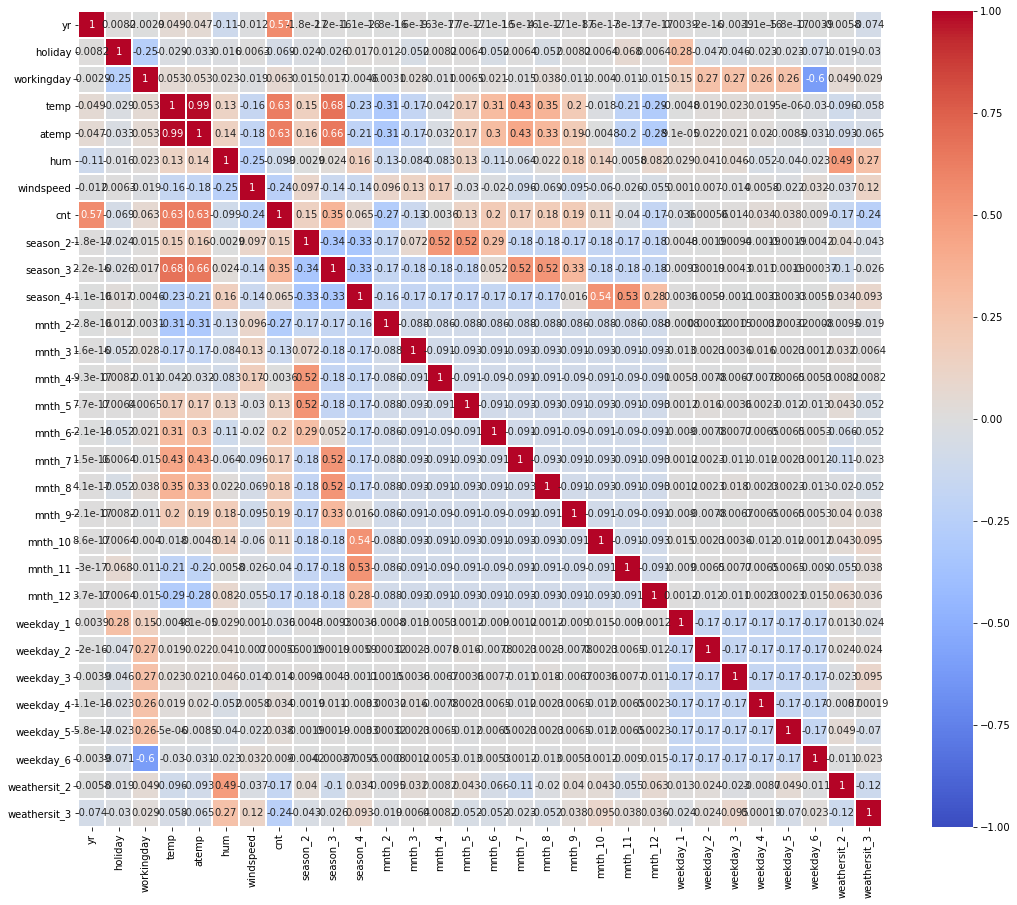

Correlation heatmap for selected variables has been displayed.


In [289]:
# Check correlation coefficients for variables in the analysis to identify highly correlated ones

plt.figure(figsize=(18, 15)) 
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", linewidths=1, vmin=-1, vmax=1, center=0)
plt.show()

print("Correlation heatmap for selected variables has been displayed.")

This highlights which variables exhibit multicollinearity and which have high collinearity with the target variable. We will refer to this heatmap throughout the process of building the linear model to validate the correlations, along with the VIF (Variance Inflation Factor) and p-values, in order to identify the appropriate variables to include or exclude from the model.

In [290]:
#Initialising MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [291]:
# Checking the values in the training dataset before scaling

print("First few rows of the training dataset before scaling:")
df_train.head()

First few rows of the training dataset before scaling:


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
# Display the columns in the training dataset

print("Columns in the training dataset:")
print(df_train.columns)

Columns in the training dataset:
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [293]:
# Apply MinMaxScaler to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [294]:
# Checking the values in the training dataset after scaling

print("First few rows of the training dataset after scaling:")
df_train.head()

First few rows of the training dataset after scaling:


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
# Display summary statistics of the training dataset

print("Summary statistics of the training dataset:")
df_train.describe()

Summary statistics of the training dataset:


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Developing a Linear Model

In [296]:
# Separate the target variable 'cnt' from the training dataset

y_train = df_train.pop('cnt')
X_train = df_train

In [297]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the desired number of selected features equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [298]:
# Display the selected features, their support status, and their rankings

selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print("Features selected by RFE, their support status, and rankings:")
print(selected_features)

Features selected by RFE, their support status, and rankings:
[('yr', True, 1), ('holiday', False, 13), ('workingday', True, 1), ('temp', True, 1), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_2', True, 1), ('season_3', True, 1), ('season_4', True, 1), ('mnth_2', False, 7), ('mnth_3', True, 1), ('mnth_4', False, 3), ('mnth_5', False, 2), ('mnth_6', False, 4), ('mnth_7', False, 15), ('mnth_8', False, 5), ('mnth_9', True, 1), ('mnth_10', True, 1), ('mnth_11', False, 8), ('mnth_12', False, 14), ('weekday_1', False, 6), ('weekday_2', False, 12), ('weekday_3', False, 10), ('weekday_4', False, 11), ('weekday_5', False, 9), ('weekday_6', True, 1), ('weathersit_2', True, 1), ('weathersit_3', True, 1)]


In [299]:
# Extract the names of the selected features from the RFE result

selected_columns = X_train.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_columns)


Selected features by RFE:
Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [300]:
# Extract the names of the features that were not selected by RFE

dropped_columns = X_train.columns[~rfe.support_]
print("Features not selected by RFE:")
print(dropped_columns)


Features not selected by RFE:
Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')


In [301]:
# Create a new dataframe with the RFE-selected features
X_train_rfe = X_train[selected_columns]

print("New training dataset created with RFE-selected features.")

New training dataset created with RFE-selected features.


Linear Model 1 :

In [302]:
# Check for the VIF (Variance Inflation Factor) values of the selected features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to hold the feature names and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values of the selected features:")
print(vif)


VIF values of the selected features:
        Features     VIF
2           temp  384.22
3          atemp  363.12
4            hum   17.52
7       season_3    7.09
5      windspeed    4.71
1     workingday    4.61
6       season_2    3.54
8       season_4    3.01
13  weathersit_2    2.14
0             yr    2.02
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17


In [303]:
#!pip install scipy==1.9.3 --user
#!pip install statsmodels==0.13.5 --user

import scipy
import statsmodels

print(scipy.__version__)
print(statsmodels.__version__)

1.6.2
0.12.2


In [304]:
import statsmodels.api as sm

# Add a constant to the features for the linear regression model
X_train_lm1 = sm.add_constant(X_train_rfe)

# Fit the linear regression model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

print("Linear regression model has been fitted with selected features.")

# Display the parameters (coefficients) obtained from the fitted model
print("Model parameters (coefficients):")
print(lr1.params)

Linear regression model has been fitted with selected features.
Model parameters (coefficients):
const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64


In [305]:
# Print a detailed summary of the linear regression model
print("Summary of the linear regression model:")
print(lr1.summary())


Summary of the linear regression model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.28e-186
Time:                        13:37:42   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

Model 2 :
(Excluding the variable 'atemp' due to its high p-value and high VIF.)

In [306]:
# Drop the 'atemp' feature from the training dataset
X_train_new = X_train_rfe.drop(["atemp"], axis=1)

print("The 'atemp' feature has been dropped from the training dataset.")

The 'atemp' feature has been dropped from the training dataset.


In [307]:
# Check the VIF (Variance Inflation Factor) values of the updated feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the feature names and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values of the updated feature variables:")
print(vif)


VIF values of the updated feature variables:
        Features    VIF
2           temp  23.21
3            hum  17.23
6       season_3   7.01
1     workingday   4.60
4      windspeed   4.55
5       season_2   3.54
7       season_4   3.01
12  weathersit_2   2.14
0             yr   2.02
11     weekday_6   1.79
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17


In [308]:
# Add a constant to the updated features for the linear regression model
X_train_lm2 = sm.add_constant(X_train_new)

# Fit the linear regression model with the new features
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print("Linear regression model has been fitted with the updated features.")


Linear regression model has been fitted with the updated features.


In [309]:
# Display the parameters (coefficients) obtained from the new fitted model
print("Model parameters (coefficients) for the updated features:")
print(lr2.params)


Model parameters (coefficients) for the updated features:
const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64


In [310]:
# Print a detailed summary of the linear regression model with updated features
print("Summary of the linear regression model with updated features:")
print(lr2.summary())


Summary of the linear regression model with updated features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.00e-187
Time:                        13:37:47   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Model 3:
(Excluding the variable 'hum' due to its very high VIF value. Although 'hum' has the second-highest VIF, we chose to drop 'hum' instead of 'temp' based on the understanding that temperature is a critical factor for a business like bike rentals, and we wanted to retain 'temp'.)

In [311]:
# Drop the 'hum' feature from the updated training dataset
X_train_new = X_train_new.drop(["hum"], axis=1)

print("The 'hum' feature has been dropped from the updated training dataset.")


The 'hum' feature has been dropped from the updated training dataset.


In [312]:
# Check the VIF (Variance Inflation Factor) values of the remaining feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the names of the features and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values of the remaining features:")
print(vif)


VIF values of the remaining features:
        Features    VIF
2           temp  16.81
5       season_3   6.75
3      windspeed   4.27
1     workingday   4.11
4       season_2   3.51
6       season_4   2.89
0             yr   2.02
9        mnth_10   1.66
10     weekday_6   1.66
11  weathersit_2   1.54
8         mnth_9   1.27
7         mnth_3   1.20
12  weathersit_3   1.08


In [313]:
# Add a constant to the remaining features for the linear regression model
X_train_lm3 = sm.add_constant(X_train_new)

# Fit the linear regression model with the remaining features
lr3 = sm.OLS(y_train, X_train_lm3).fit()

print("Linear regression model has been fitted with the remaining features.")

# Display the parameters (coefficients) obtained from the latest fitted model
print("Model parameters (coefficients) for the remaining features:")
print(lr3.params)


Linear regression model has been fitted with the remaining features.
Model parameters (coefficients) for the remaining features:
const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64


In [314]:
# Print a detailed summary of the linear regression model with the remaining features
print("Summary of the linear regression model with the remaining features:")
print(lr3.summary())


Summary of the linear regression model with the remaining features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.52e-184
Time:                        13:37:52   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Model 4:
(Excluding the variable 'season3' due to its very high VIF value. Although 'season3' has the second-highest VIF, we chose to drop 'season3' instead of 'temp' based on the understanding that temperature is a crucial factor for a bike rental business, and we wanted to retain 'temp'.)

In [315]:
# Drop the 'season_3' feature from the updated training dataset
X_train_new = X_train_new.drop(["season_3"], axis=1)

print("The 'season_3' feature has been dropped from the updated training dataset.")


The 'season_3' feature has been dropped from the updated training dataset.


In [316]:
# Check the VIF (Variance Inflation Factor) values of the remaining feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the features and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values for the remaining features:")
print(vif)


VIF values for the remaining features:
        Features   VIF
2           temp  4.92
3      windspeed  4.15
1     workingday  4.07
0             yr  2.01
5       season_4  1.98
9      weekday_6  1.66
8        mnth_10  1.63
4       season_2  1.56
10  weathersit_2  1.54
7         mnth_9  1.23
6         mnth_3  1.15
11  weathersit_3  1.08


In [317]:
# Add a constant to the remaining features for the linear regression model
X_train_lm4 = sm.add_constant(X_train_new)

# Fit the linear regression model with the remaining features
lr4 = sm.OLS(y_train, X_train_lm4).fit()

print("Linear regression model has been fitted with the remaining features.")

# Display the parameters (coefficients) obtained from the latest fitted model
print("Model parameters (coefficients) for the remaining features:")
print(lr4.params)


Linear regression model has been fitted with the remaining features.
Model parameters (coefficients) for the remaining features:
const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64


In [318]:
# Print a detailed summary of the linear regression model with the remaining features
print("Summary of the linear regression model with the remaining features:")
print(lr4.summary())


Summary of the linear regression model with the remaining features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.56e-181
Time:                        13:37:57   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Model 5:
(Excluding the variable 'mnth_10' due to its very high p-value.)

In [319]:
# Drop the 'mnth_10' feature from the updated training dataset
X_train_new = X_train_new.drop(["mnth_10"], axis=1)

print("The 'mnth_10' feature has been dropped from the updated training dataset.")


The 'mnth_10' feature has been dropped from the updated training dataset.


In [320]:
# Check the VIF (Variance Inflation Factor) values of the remaining feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the features and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values for the remaining features after dropping 'mnth_10':")
print(vif)


VIF values for the remaining features after dropping 'mnth_10':
        Features   VIF
2           temp  4.80
3      windspeed  4.11
1     workingday  4.07
0             yr  2.00
8      weekday_6  1.66
4       season_2  1.56
9   weathersit_2  1.53
5       season_4  1.41
7         mnth_9  1.20
6         mnth_3  1.15
10  weathersit_3  1.07


In [321]:
# Add a constant to the remaining features for the linear regression model
X_train_lm5 = sm.add_constant(X_train_new)

# Fit the linear regression model with the remaining features
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Display the parameters (coefficients) obtained from the latest fitted model
print("Model parameters (coefficients) for the updated features:")
print(lr5.params)


Model parameters (coefficients) for the updated features:
const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64


In [322]:
# Print a detailed summary of the linear regression model with the updated features
print("Summary of the linear regression model with the updated features:")
print(lr5.summary())


Summary of the linear regression model with the updated features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.39e-181
Time:                        13:38:00   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Model 6:
(Excluding the variable 'mnth_3' due to its high p-value.)

In [323]:
# Drop the 'mnth_3' feature from the updated training dataset
X_train_new = X_train_new.drop(["mnth_3"], axis=1)

print("The 'mnth_3' feature has been dropped from the updated training dataset.")


The 'mnth_3' feature has been dropped from the updated training dataset.


In [324]:
# Check the VIF (Variance Inflation Factor) values of the remaining feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the names of the features and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values for the remaining features after dropping 'mnth_3':")
print(vif)


VIF values for the remaining features after dropping 'mnth_3':
       Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07


In [325]:
# Add a constant to the remaining features for the linear regression model
X_train_lm6 = sm.add_constant(X_train_new)

# Fit the linear regression model with the remaining features
lr6 = sm.OLS(y_train, X_train_lm6).fit()

print("Linear regression model has been fitted with the remaining features.")

# Display the parameters (coefficients) obtained from the latest fitted model
print("Model parameters (coefficients) for the updated features:")
print(lr6.params)


Linear regression model has been fitted with the remaining features.
Model parameters (coefficients) for the updated features:
const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64


In [326]:
# Print a detailed summary of the linear regression model with the updated features
print("Summary of the linear regression model with the updated features:")
print(lr6.summary())


Summary of the linear regression model with the updated features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.77e-181
Time:                        13:38:04   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

This model appears to be well-constructed, with very low multicollinearity between the predictors, and the p-values for all predictors are significant. For now, we will consider this as our final model, unless the metrics from the test data show significant discrepancies.

### Interpretation of the Final Model

The hypotheses for the model are:

H0: B1 = B2 = ... = Bn = 0 (All coefficients are equal to zero, meaning no relationship between predictors and the target variable).
H1: At least one Bi ≠ 0 (At least one coefficient is not equal to zero, indicating a relationship between predictors and the target variable).
lr6 Model Coefficients:

const: 0.084143
yr: 0.230846
workingday: 0.043203
temp: 0.563615
windspeed: -0.155191
season_2: 0.082706
season_4: 0.128744
mnth_9: 0.094743
weekday_6: 0.056909
weathersit_2: -0.074807
weathersit_3: -0.306992
Insights:

From the lr6 model summary, it is clear that none of the coefficients are equal to zero. Therefore, we reject the null hypothesis (H0), which means that there is a relationship between the predictors and the target variable.


The F-statistic is used to test the overall significance of the model. The higher the F-statistic, the more significant the model is.

F-statistic: 233.8
Prob (F-statistic): 3.77e-181
The F-statistic value of 233.8 (which is significantly greater than 1) and the p-value of approximately 0.0000 indicate that the overall model is statistically significant.

Equation of the Best-Fitted Surface (lr6 Model):

cnt=0.084143+(yr×0.230846)+(workingday×0.043203)+(temp×0.563615)−(windspeed×0.155191)+(season2×0.082706)+(season4×0.128744)+(mnth9×0.094743)+(weekday6×0.056909)−(weathersit2×0.074807)−(weathersit3×0.306992)
Interpretation of Coefficients:

temp: A coefficient of 0.5636 means that for each unit increase in temperature, the number of bike hires increases by 0.5636 units.
weathersit_3: A coefficient of -0.3070 means that compared to Weathersit1, a unit increase in Weathersit3 decreases bike hires by 0.3070 units.
yr: A coefficient of 0.2308 means that for each unit increase in the year, bike hires increase by 0.2308 units.
season_4: A coefficient of 0.128744 means that compared to season_1, a unit increase in season_4 increases bike hires by 0.128744 units.
windspeed: A coefficient of -0.155191 means that for each unit increase in windspeed, bike hires decrease by 0.155191 units.
workingday: A coefficient of 0.043203 means that for each unit increase in workingday, bike hires increase by 0.043203 units.
season_2: A coefficient of 0.082706 means that compared to season_1, a unit increase in season_2 increases bike hires by 0.082706 units.
mnth_9: A coefficient of 0.094743 means that compared to month_1, a unit increase in month_9 increases bike hires by 0.094743 units.
weekday_6: A coefficient of 0.056909 means that compared to weekday_1, a unit increase in weekday_6 increases bike hires by 0.056909 units.
weathersit_2: A coefficient of -0.074807 means that compared to Weathersit1, a unit increase in Weathersit2 decreases bike hires by 0.074807 units.
const (Intercept): A constant value of 0.084143 means that when all predictor variables are zero, bike rentals can still increase by 0.084143 units.

In [327]:
# Make predictions on the training data using the fitted model
y_train_pred = lr6.predict(X_train_lm6)

print("Predictions for the training dataset have been generated.")


Predictions for the training dataset have been generated.


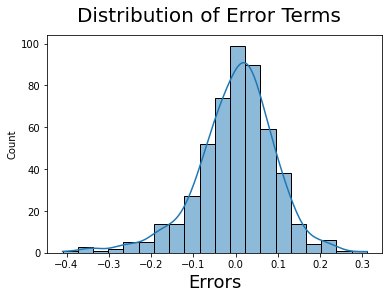

Histogram of the error terms has been displayed.


In [328]:
# Calculate the residuals (error terms)
residuals = y_train - y_train_pred

# Plot the histogram of the residuals (error terms)
fig = plt.figure()
sns.histplot(residuals, bins=20, kde=True)
fig.suptitle('Distribution of Error Terms', fontsize=20)  # Plot title
plt.xlabel('Errors', fontsize=18)
plt.show()

print("Histogram of the error terms has been displayed.")


we can observe that the residuals are normally distributed, which confirms that the assumption for linear regression holds true. This suggests that the model is appropriately specified and the residuals do not violate the normality assumption.

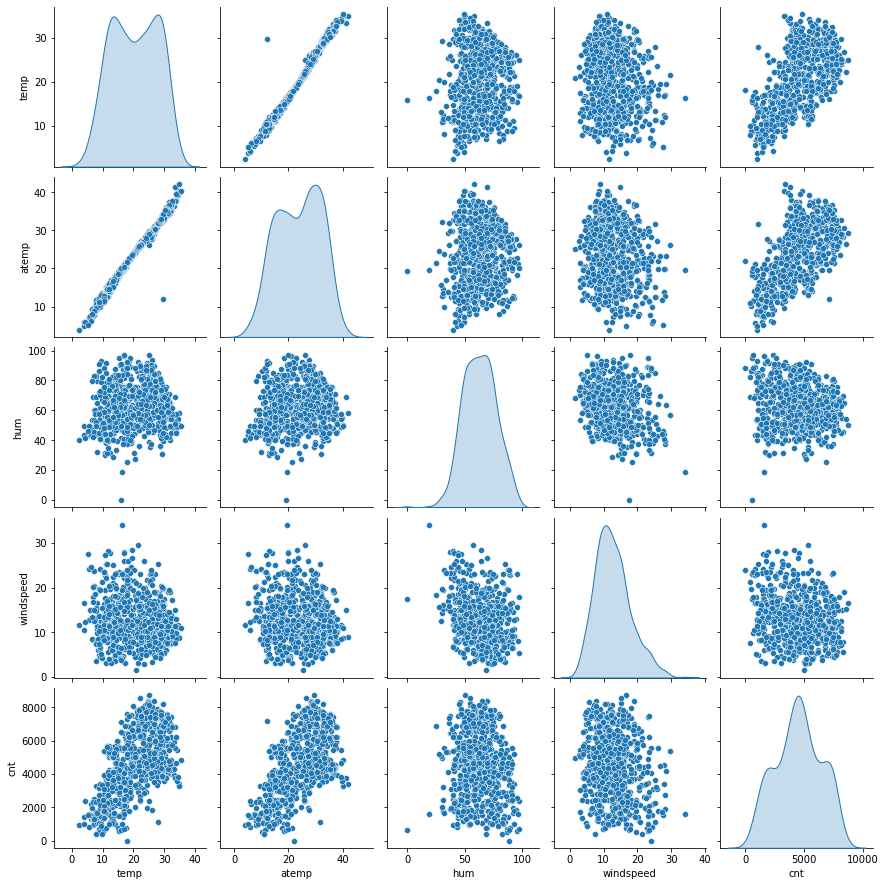

Pairplot for the selected numeric features has been displayed.


In [329]:
# Select relevant numeric columns for analysis
bike_selected = bike_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Create pairplot to visualize relationships between numeric variables
sns.pairplot(bike_selected, diag_kind='kde')
plt.show()

print("Pairplot for the selected numeric features has been displayed.")


We can observe a linear relationship between the 'temp' and 'atemp' variables with the predictor 'cnt'. This suggests that both temperature-related variables are strongly associated with the target variable, which is the number of bike rentals.




In [330]:
# Check the Variance Inflation Factor (VIF) values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store feature names and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print("VIF values for the remaining features after the adjustments:")
print(vif)


VIF values for the remaining features after the adjustments:
       Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07


We can conclude that there is no multicollinearity among the predictor variables, as all VIF values are within the permissible range of below 5. This indicates that the predictors are not highly correlated with each other, ensuring the stability of the model.

### Generating Predictions with the Final Model

In [331]:
# Apply the previously fitted scaler to all numeric variables in the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

print("Test dataset has been scaled using the training dataset's scaler.")


Test dataset has been scaled using the training dataset's scaler.


In [332]:
# Display the first few rows of the test dataset after scaling
print("First few rows of the scaled test dataset:")
print(df_test.head())


First few rows of the scaled test dataset:
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           0  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           0  0.951196  0.933712  0.596104   0.212829   
504   1        0           0  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
22   0.110907         0         0  ...        0        0          0   
468  0.855729         1         0  ...        0        0          0   
553  0.534975         0         1  ...        0        0          0   
504  0.817648         1         0  ...        0        0          0   
353  0.428900         0         0  ...        0        1          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
22           0 

In [333]:
# Display statistical summary of the test dataset after scaling
print("Statistical summary of the scaled test dataset:")
print(df_test.describe())


Statistical summary of the scaled test dataset:
               yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932    0.551225    0.527528    0.662567   
std      0.501098    0.198967    0.465607    0.229463    0.215434    0.143562   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.356479    0.348019    0.553031   
50%      0.000000    0.000000    1.000000    0.557653    0.549198    0.662338   
75%      1.000000    0.000000    1.000000    0.751309    0.709163    0.762338   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.346706    0.518889    0.264840    0.246575  ...    0.073059   


In [334]:
# Separate the target variable 'cnt' from the test dataset and store it in y_test
y_test = df_test.pop('cnt')

# Store the features in X_test
X_test = df_test

# Display information about the test dataset features
print("Information about the test dataset features:")
X_test.info()


Information about the test dataset features:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null 

In [335]:
# Select the variables that were used in the final model
selected_columns = X_train_new.columns
X_test = X_test[selected_columns]

# Add a constant variable to the test dataset
X_test_lm6 = sm.add_constant(X_test)

# Display information about the test dataset with the added constant
print("Information about the test dataset with the added constant:")
X_test_lm6.info()


Information about the test dataset with the added constant:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [336]:
# Make predictions using the final linear regression model (lr6) on the test dataset
y_pred = lr6.predict(X_test_lm6)

print("Predictions for the test dataset have been generated.")


Predictions for the test dataset have been generated.


### Model Evaluation

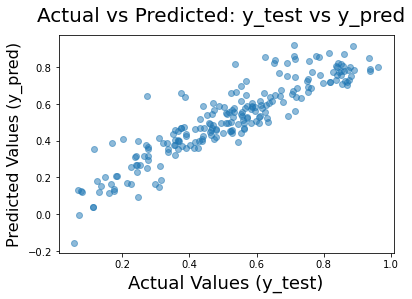

Scatter plot of actual vs predicted values has been displayed.


In [337]:
# Plot the actual values (y_test) vs predicted values (y_pred) to visualize the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)

# Set plot title and labels
fig.suptitle('Actual vs Predicted: y_test vs y_pred', fontsize=20)
plt.xlabel('Actual Values (y_test)', fontsize=18)
plt.ylabel('Predicted Values (y_pred)', fontsize=16)

# Display the plot
plt.show()

print("Scatter plot of actual vs predicted values has been displayed.")


In [338]:
# Import R-squared metric from sklearn
from sklearn.metrics import r2_score

# Calculate R-squared score for the model's predictions
r2_value = r2_score(y_test, y_pred)

# Display the R-squared value
print(f"The R-squared value for the model is: {r2_value:.4f}")


The R-squared value for the model is: 0.8203


In [339]:
# Get the shape of the test dataset
print(f"The shape of the test dataset is: {X_test.shape}")


The shape of the test dataset is: (219, 10)


In [340]:
n = X_test.shape[0] # n = no. of rows in X

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Findind ddjusted R-squared:

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

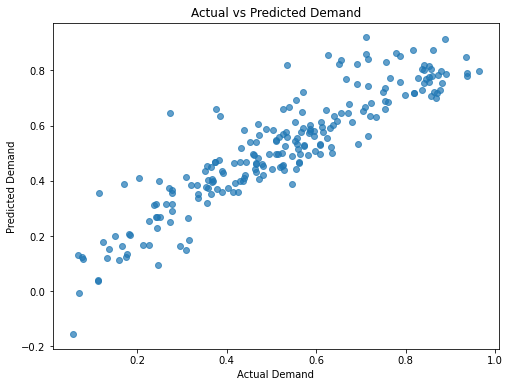

In [341]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.show()

In [342]:
# Conclusion
print("The model explains {}% of the variance in demand.".format(round(r2 * 100, 2)))

The model explains 82.03% of the variance in demand.


### Concluding Report

The significant variables in predicting the demand for shared bikes, as identified by the final model, are:

Temperature (temp): This variable has a strong positive relationship with bike demand. A unit increase in temperature leads to a notable increase in bike rentals (coefficient = 0.5636). This indicates that as the temperature rises, more people are likely to rent bikes, which is intuitive, as warmer weather is generally more favorable for outdoor activities.

Weather Situation 3 (weathersit_3): This variable has a negative relationship with bike rentals (coefficient = -0.3070). A unit increase in this weather situation (representing conditions like light snow or light rain) decreases bike rentals. Poor weather conditions such as snow or rain discourage people from renting bikes.

Year (yr): The year variable has a positive relationship with bike rentals (coefficient = 0.2308). This suggests that as time progresses, bike demand increases, potentially due to increasing awareness of shared bike services or growth in the popularity of eco-friendly transportation.

Season 4 (season_4): The winter season (compared to spring) is associated with a moderate increase in bike rentals (coefficient = 0.128744). This could reflect seasonal promotions, better management during winter months, or favorable weather conditions in certain regions.

Windspeed (windspeed): This variable has a negative relationship with bike rentals (coefficient = -0.155191). A unit increase in windspeed decreases bike rentals, likely because higher winds make biking less comfortable and less appealing.

These variables, particularly temperature, weather situation, and year, play a significant role in explaining bike demand. They are highly relevant to the bike rental business as they capture key external factors that influence consumer behavior. The model indicates that temperature and weather conditions are particularly strong predictors, with year providing a long-term trend indicating increasing demand.

The model overall demonstrates that external factors such as weather and seasonality, along with temporal trends, are crucial for accurately predicting shared bike demand. However, certain factors like windspeed and season_4 suggest that other elements, such as marketing efforts or infrastructure adjustments, may also contribute to demand but to a lesser extent.